# Support Vector Machine

Support Vector Machine was created to find the separate line of two classes

Weak points: Cannot be used with alot data or if there's alot of points overlay, then the naive bayes model fits better

Margin = The distance between the line and the nearest point of either of the two classes<br/>$Z=x^2 + y^2$<br/>Z will be the distance from the (0,0) from every point

Tolerate some outliers.

In [2]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

In [3]:
def prettyPicture(clf, X_test, y_test):
    import matplotlib.pyplot as plt
    import pylab as pl
    import numpy as np
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

In [4]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

Import the SVC(Support Vector Classifier) from sklearn

In [5]:
from sklearn.svm import SVC

In [21]:
#kernel=line, rbf(get every point)
#C=control the tradeoff between a smooth decision and classifying training points correctly
#gamma= a high value of gamma will consider the close points to influence in our line, while a low value will consider the far values
clf=SVC(kernel="linear")
clf.fit(features_train,labels_train)
pred=clf.predict(features_test)

If you try to use clf.score will have an error, so we need to use accuracy_score method in sklearn.metrics

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(pred,labels_test)

0.92

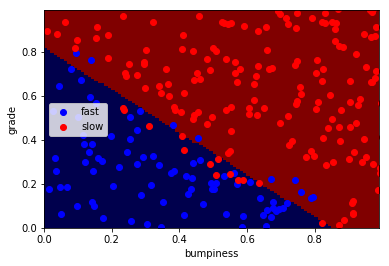

In [24]:
prettyPicture(clf,features_test,labels_test)

## Non-linear

In [53]:
#kernel=line, rbf(get every point)
#C=control the tradeoff between a smooth decision and classifying training points correctly
#gamma= a high value of gamma will consider the close points to influence in our line, while a low value will consider the far values
clf2=SVC(kernel="rbf",gamma=1000)
clf2.fit(features_train,labels_train)
pred=clf2.predict(features_test)

In [54]:
accuracy_score(pred,labels_test)

0.924

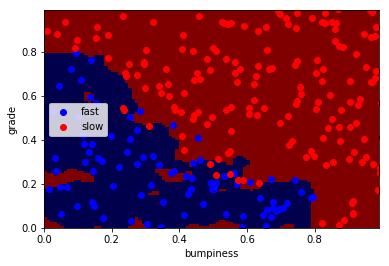

In [55]:
prettyPicture(clf2,features_test,labels_test)